<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Project/TweetEval_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Constants

In [762]:
VOCAB_SIZE=3000

#Access Data from the Files

In [763]:
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()
# print(tweets)

val_stream=open("val_text.txt")
val_tweets=val_stream.readlines()
val_stream.close()

test_stream=open("test_text.txt")
test_tweets=test_stream.readlines()
test_stream.close()

In [764]:
print(len(tweets), len(val_tweets))

11916 1324


In [765]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    tweets[i]=re.sub('@user', '', tweets[i])

for i in range(len(val_tweets)):
  if val_tweets[i].find('@user')!=-1:
    val_tweets[i]=re.sub('@user', '', val_tweets[i])

for i in range(len(test_tweets)):
  if test_tweets[i].find('@user')!=-1:
    test_tweets[i]=re.sub('@user', '', test_tweets[i])
# tweets    
# Words like effing converted to VetsResistSquadron

In [766]:
# tweetStrings = [ tw for tw in tweetStrings if tw!='' and tw!=' '] 

In [767]:
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()

val_stream=open("val_labels.txt")
val_tweetsLabels=val_stream.readlines()
val_stream.close()

test_stream=open("test_labels.txt")
test_tweetsLabels=test_stream.readlines()
test_stream.close()

In [768]:
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
# labels    
# Words like effing converted to VetsResistSquadron

val_labels=[0]*len(val_tweetsLabels)
for i in range(len(val_tweetsLabels)):
  if val_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    val_labels[i]=int(re.sub('\n', '', val_tweetsLabels[i]))

test_labels=[0]*len(test_tweetsLabels)
for i in range(len(test_tweetsLabels)):
  if test_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    test_labels[i]=int(re.sub('\n', '', test_tweetsLabels[i]))

In [769]:
print(len(labels), len(val_labels), len(test_labels))

11916 1324 860


#Convert to DataFrame

In [770]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
df=pd.DataFrame(rows, index=rowIndices)

val_rows=[]
val_rowIndices=[]
for i in range(len(val_tweets)):
  val_rows.append({"TWEET":val_tweets[i], "CATEGORY":val_labels[i]})
  val_rowIndices.append(i+1)
val_df=pd.DataFrame(val_rows, index=val_rowIndices)

test_rows=[]
test_rowIndices=[]
for i in range(len(test_tweets)):
  test_rows.append({"TWEET":test_tweets[i], "CATEGORY":test_labels[i]})
  test_rowIndices.append(i+1)
test_df=pd.DataFrame(test_rows, index=test_rowIndices)

In [771]:
print(df.head())
print(df.shape)
type(df.CATEGORY)

                                               TWEET  CATEGORY
1   Bono... who cares. Soon people will understan...         0
2   Eight years the republicans denied obama’s pi...         1
3   Get him some line help. He is gonna be just f...         0
4                         She is great. Hi Fiona! \n         0
5   She has become a parody unto herself? She has...         1
(11916, 2)


pandas.core.series.Series

In [772]:
print(val_df.head())
print(val_df.shape)
type(val_df.CATEGORY)

                                               TWEET  CATEGORY
1                WiiU is not even a real console. \n         0
2     If he is from AZ I would put my money on se...         1
3   I thought Canada had strict gun control.  Hel...         0
4                  Following all #Maga patriots p...         0
5             1 Minute of Truth: Gun Control via  \n         0
(1324, 2)


pandas.core.series.Series

In [773]:
print(test_df.head())
print(test_df.shape)
type(test_df.CATEGORY)

                                               TWEET  CATEGORY
1  #ibelieveblaseyford is liar she is fat ugly li...         1
2     I got in a pretty deep debate with my frien...         0
3  ...if you want more shootings and more death, ...         0
4  Angels now have 6 runs. Five of them have come...         0
5  #Travel #Movies and Unix #Fortune combined  Vi...         0
(860, 2)


pandas.core.series.Series

#Check for missing values or null tweets

In [774]:
df.TWEET.isnull().values.any()

False

In [775]:
val_df.TWEET.isnull().values.any()

False

In [776]:
test_df.TWEET.isnull().values.any()

False

In [777]:
df.CATEGORY.isnull().values.any()

False

In [778]:
val_df.CATEGORY.isnull().values.any()

False

In [779]:
test_df.CATEGORY.isnull().values.any()

False

In [780]:
#Check if there are empty tweets(With string length zero).
(df.TWEET.str.len()==0).any()

False

In [781]:
#Check if there are empty tweets(With string length zero).
(val_df.TWEET.str.len()==0).any()

False

In [782]:
#Check if there are empty tweets(With string length zero).
(test_df.TWEET.str.len()==0).any()

False

#Offensive and non-offensive counts

In [783]:
df.CATEGORY.value_counts()

0    7976
1    3940
Name: CATEGORY, dtype: int64

In [784]:
val_df.CATEGORY.value_counts()

0    865
1    459
Name: CATEGORY, dtype: int64

In [785]:
test_df.CATEGORY.value_counts()

0    620
1    240
Name: CATEGORY, dtype: int64

In [786]:
num_offensive=df.CATEGORY.value_counts()[1]
num_nonoffensive=df.CATEGORY.value_counts()[0]

In [787]:
val_num_offensive=val_df.CATEGORY.value_counts()[1]
val_num_nonoffensive=val_df.CATEGORY.value_counts()[0]

In [788]:
test_num_offensive=test_df.CATEGORY.value_counts()[1]
test_num_nonoffensive=test_df.CATEGORY.value_counts()[0]

<function matplotlib.pyplot.show>

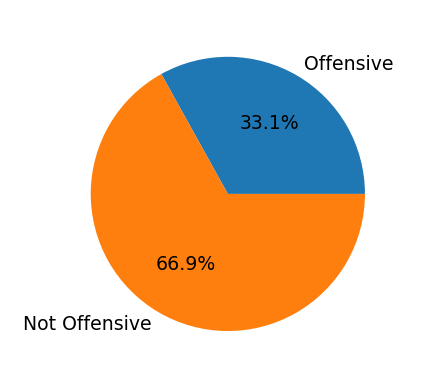

In [789]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[num_offensive, num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

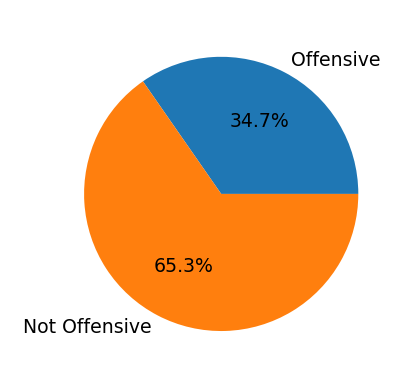

In [790]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[val_num_offensive, val_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

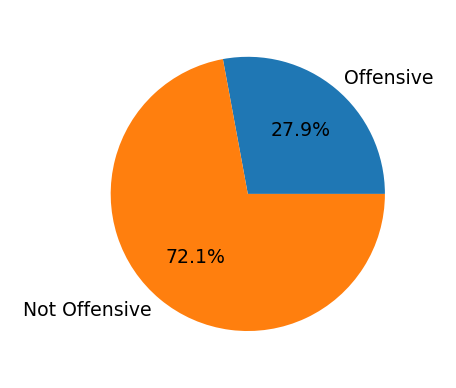

In [791]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[test_num_offensive, test_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

#NLP

###Text pre-processing

In [792]:
st="Is the tweet Offensive or not?"
st.lower()

'is the tweet offensive or not?'

###Download NLTK Resources(Tokenizer & stopwords)

In [793]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###Tokenize

In [794]:
word_tokenize(st.lower())

['is', 'the', 'tweet', 'offensive', 'or', 'not', '?']

###Remove stop words. Word stemming

In [795]:
stop_words=set(stopwords.words('english'))

In [796]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words:
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens', '?']

###Removing punctuations

In [797]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words and word.isalpha():
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens']

###Create a function for cleaning tweets

In [798]:
def clean_tweets(tweet, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
  words=word_tokenize(tweet.lower())
  filtered_words=[]
  for word in words:
    if word not in stop_words and word.isalpha():
      stemmed_word=stemmer.stem(word)
      filtered_words.append(stemmed_word)
  return filtered_words

In [799]:
clean_tweets(st)

['tweet', 'offens']

In [800]:
len(df)
type(df.TWEET[0:5])

pandas.core.series.Series

In [801]:
# %%time
tweetsList=df.TWEET
nestedList=tweetsList.apply(clean_tweets)
nestedList[0:5]

1    [bono, care, soon, peopl, understand, gain, no...
2    [eight, year, republican, deni, obama, pick, b...
3    [get, line, help, gon, na, fine, game, went, c...
4                                   [great, hi, fiona]
5    [becom, parodi, unto, certainli, taken, heat, ...
Name: TWEET, dtype: object

In [802]:
# %%time
val_tweetsList=val_df.TWEET
val_nestedList=val_tweetsList.apply(clean_tweets)
val_nestedList[0:5]

1                           [wiiu, even, real, consol]
2           [az, would, put, money, sex, underag, kid]
3    [thought, canada, strict, gun, control, help, ...
4    [follow, maga, patriot, pleas, follow, back, l...
5                    [minut, truth, gun, control, via]
Name: TWEET, dtype: object

In [803]:
# %%time
test_tweetsList=test_df.TWEET
test_nestedList=test_tweetsList.apply(clean_tweets)
test_nestedList[0:5]

1    [ibelieveblaseyford, liar, fat, ugli, libreal,...
2    [got, pretti, deep, debat, friend, told, latin...
3    [want, shoot, death, listen, aclu, black, live...
4    [angel, run, five, come, courtesi, mike, trout...
5    [travel, movi, unix, fortun, combin, visit, sa...
Name: TWEET, dtype: object

In [804]:
# %%time
flatList=[item for subitem in nestedList for item in subitem]
len(flatList)

117489

In [805]:
# %%time
val_flatList=[item for subitem in val_nestedList for item in subitem]
len(val_flatList)

13723

In [806]:
# %%time
test_flatList=[item for subitem in test_nestedList for item in subitem]
len(test_flatList)

10502

In [807]:
tw_id_offensive=df[df.CATEGORY==1].index
tw_id_non_offensive=df[df.CATEGORY==0].index

val_tw_id_offensive=val_df[val_df.CATEGORY==1].index
val_tw_id_non_offensive=val_df[val_df.CATEGORY==0].index

test_tw_id_offensive=test_df[test_df.CATEGORY==1].index
test_tw_id_non_offensive=test_df[test_df.CATEGORY==0].index

In [808]:
tw_nested_off=nestedList.loc[tw_id_offensive]
tw_nested_non_off=nestedList.loc[tw_id_non_offensive]

val_tw_nested_off=val_nestedList.loc[val_tw_id_offensive]
val_tw_nested_non_off=val_nestedList.loc[val_tw_id_non_offensive]

test_tw_nested_off=test_nestedList.loc[test_tw_id_offensive]
test_tw_nested_non_off=test_nestedList.loc[test_tw_id_non_offensive]

In [809]:
flat_off=[item for subitem in tw_nested_off for item in subitem]
flat_non_off=[item for subitem in tw_nested_non_off for item in subitem]
off_words=pd.Series(flat_off).value_counts()
non_off_words=pd.Series(flat_non_off).value_counts()

# 5 most common words in offensive tweets
off_words[0:5]

liber      572
gun        491
like       446
control    400
peopl      341
dtype: int64

In [810]:
val_flat_off=[item for subitem in val_tw_nested_off for item in subitem]
val_flat_non_off=[item for subitem in val_tw_nested_non_off for item in subitem]
val_off_words=pd.Series(val_flat_off).value_counts()
val_non_off_words=pd.Series(val_flat_non_off).value_counts()

# 5 most common words in offensive tweets
val_off_words[0:5]

gun        71
liber      63
like       59
control    59
get        44
dtype: int64

In [811]:
test_flat_off=[item for subitem in test_tw_nested_off for item in subitem]
test_flat_non_off=[item for subitem in test_tw_nested_non_off for item in subitem]
test_off_words=pd.Series(test_flat_off).value_counts()
test_non_off_words=pd.Series(test_flat_non_off).value_counts()

# 5 most common words in offensive tweets
test_off_words[0:5]

liber      45
get        29
antifa     24
conserv    23
shit       22
dtype: int64

In [812]:
# 5 most common words in non-offensive tweets
non_off_words[0:5]

liber      902
gun        889
antifa     768
control    715
conserv    689
dtype: int64

In [813]:
# 5 most common words in non-offensive tweets
val_non_off_words[0:5]

liber      87
conserv    86
antifa     84
gun        74
maga       71
dtype: int64

In [814]:
# 5 most common words in non-offensive tweets
test_non_off_words[0:5]

gun        59
conserv    59
control    57
antifa     50
like       49
dtype: int64

In [815]:
print("Off ",off_words.shape[0]," non-off ",non_off_words.shape[0])

print("Off ",val_off_words.shape[0]," non-off ",val_non_off_words.shape[0])

print("Off ",test_off_words.shape[0]," non-off ",test_non_off_words.shape[0])

Off  6797  non-off  9906
Off  2066  non-off  2887
Off  1515  non-off  3234


In [816]:
stemmed_nested_list=df.TWEET.apply(clean_tweets)
flat_stemmed_list=[item for subitem in stemmed_nested_list for item in subitem]
unique_words=pd.Series(flat_stemmed_list).value_counts()
print("Number of unique words ",unique_words.shape[0])
unique_words.head()

Number of unique words  12337


liber      1474
gun        1380
control    1115
like       1068
antifa     1047
dtype: int64

In [817]:
val_stemmed_nested_list=val_df.TWEET.apply(clean_tweets)
val_flat_stemmed_list=[item for subitem in val_stemmed_nested_list for item in subitem]
val_unique_words=pd.Series(val_flat_stemmed_list).value_counts()
print("Number of unique words ",val_unique_words.shape[0])
val_unique_words.head()

Number of unique words  3808


liber      150
gun        145
control    128
like       125
conserv    119
dtype: int64

In [818]:
test_stemmed_nested_list=test_df.TWEET.apply(clean_tweets)
test_flat_stemmed_list=[item for subitem in test_stemmed_nested_list for item in subitem]
test_unique_words=pd.Series(test_flat_stemmed_list).value_counts()
print("Number of unique words ",test_unique_words.shape[0])
test_unique_words.head()

Number of unique words  3950


liber      88
conserv    82
antifa     74
gun        72
like       69
dtype: int64

In [819]:
frequent_words=unique_words[0:VOCAB_SIZE]
frequent_words[0:10]

liber      1474
gun        1380
control    1115
like       1068
antifa     1047
conserv     942
maga        908
peopl       840
get         803
know        657
dtype: int64

In [820]:
val_frequent_words=val_unique_words[0:VOCAB_SIZE]
val_frequent_words[0:10]

liber      150
gun        145
control    128
like       125
conserv    119
antifa     118
get        100
maga        98
peopl       89
go          88
dtype: int64

In [821]:
test_frequent_words=test_unique_words[0:VOCAB_SIZE]
test_frequent_words[0:10]

liber      88
conserv    82
antifa     74
gun        72
like       69
get        68
control    68
maga       57
want       54
go         51
dtype: int64

In [822]:
word_ids=list(range(0,VOCAB_SIZE))
vocab=pd.DataFrame({"VOCAB_WORD":frequent_words.index.values}, index=word_ids)
vocab.index.name="WORD_ID"
vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,gun
2,control
3,like
4,antifa


In [823]:
val_word_ids=list(range(0,VOCAB_SIZE))
val_vocab=pd.DataFrame({"VOCAB_WORD":val_frequent_words.index.values}, index=word_ids)
val_vocab.index.name="WORD_ID"
val_vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,gun
2,control
3,like
4,conserv


In [824]:
test_word_ids=list(range(0,VOCAB_SIZE))
test_vocab=pd.DataFrame({"VOCAB_WORD":test_frequent_words.index.values}, index=word_ids)
test_vocab.index.name="WORD_ID"
test_vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,conserv
2,antifa
3,gun
4,like


In [825]:
# saved file

#Generate feature and sparse matrix

###Creating a dataframe with one word per column

In [826]:
type(stemmed_nested_list)
type(val_stemmed_nested_list)

pandas.core.series.Series

In [827]:
word_columns_df=pd.DataFrame.from_records(stemmed_nested_list.to_list())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,bono,care,soon,peopl,understand,gain,noth,follow,phoni,celebr,becom,leader,peopl,instead,help,support,fellow,countrymen,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,eight,year,republican,deni,obama,pick,breitbart,outrag,phoni,fake,presid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,get,line,help,gon,na,fine,game,went,could,see,progress,read,brought,miss,deep,ball,presenc,need,littl,time,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,great,hi,fiona,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,becom,parodi,unto,certainli,taken,heat,idiot,could,optic,know,liber,optic,substanc,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [828]:
val_word_columns_df=pd.DataFrame.from_records(val_stemmed_nested_list.to_list())
val_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,wiiu,even,real,consol,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,az,would,put,money,sex,underag,kid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,thought,canada,strict,gun,control,help,understand,happen,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,follow,maga,patriot,pleas,follow,back,lionsden,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,minut,truth,gun,control,via,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [829]:
test_word_columns_df=pd.DataFrame.from_records(test_stemmed_nested_list.to_list())
test_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,ibelieveblaseyford,liar,fat,ugli,libreal,snowflak,sold,get,cash,dem,iran,spoke,johnkerryiranmeet,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,got,pretti,deep,debat,friend,told,latino,trump,black,trump,paid,support,said,mean,antifa,paid,domest,terrorist,said,said,fascist,kid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,want,shoot,death,listen,aclu,black,live,matter,antifa,want,public,safeti,listen,polic,profession,studi,year,jeff,session,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,angel,run,five,come,courtesi,mike,trout,homer,trout,connect,pitch,runner,second,third,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,travel,movi,unix,fortun,combin,visit,salisburi,see,sight,wherev,go,old,travel,intern,spi,find,centr,vast,intern,conspiraci,return,home,recal,recal,recal,None,None,None,None,None,None,None,None,None,None,None,None


In [830]:
# features:word_columns_df, labels: df.CATEGORY
word_columns_df.shape
# df.CATEGORY.at[1]

(11916, 43)

In [831]:
# features:word_columns_df, labels: df.CATEGORY
val_word_columns_df.shape
# val_df.CATEGORY.at[1]

(1324, 33)

In [832]:
# features:word_columns_df, labels: df.CATEGORY
test_word_columns_df.shape
# val_df.CATEGORY.at[1]

(860, 37)

###Create a sparse matrix for the training data

In [833]:
word_index=pd.Index(vocab.VOCAB_WORD)
type(word_index)

val_word_index=pd.Index(vocab.VOCAB_WORD)
type(val_word_index)

test_word_index=pd.Index(vocab.VOCAB_WORD)
type(test_word_index)

pandas.core.indexes.base.Index

In [834]:
word_index.get_loc('gun')

1

In [835]:
def make_sparse_matrix(df, indexed_words, labels):
  nr_rows=df.shape[0]
  nr_cols=df.shape[1]
  word_set=set(indexed_words)
  dict_list=[]

  for i in range(nr_rows):
    for j in range(nr_cols):
      word=df.iat[i,j]
      if word in word_set:
        tw_id=df.index[i]
        word_id=indexed_words.get_loc(word)
        category=labels.at[tw_id+1]
        item={'TWEET_ID': tw_id, 'LABEL':category , 'OCCURENCE':1, 'WORD_ID':word_id}

        dict_list.append(item)
  return pd.DataFrame(dict_list)

In [836]:
%%time
sparse_train_df=make_sparse_matrix(word_columns_df, word_index, df.CATEGORY)

sparse_val_df=make_sparse_matrix(val_word_columns_df, val_word_index, val_df.CATEGORY)

sparse_test_df=make_sparse_matrix(test_word_columns_df, test_word_index, test_df.CATEGORY)

CPU times: user 16.2 s, sys: 66.2 ms, total: 16.3 s
Wall time: 16.4 s


In [837]:
sparse_train_df[200:205]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
200,20,0,1,41
201,21,1,1,43
202,21,1,1,409
203,21,1,1,30
204,21,1,1,43


In [838]:
sparse_train_df.shape

(103015, 4)

In [839]:
sparse_val_df.shape

(11851, 4)

In [840]:
sparse_test_df.shape

(8067, 4)

In [841]:
sparse_train_df[-5:]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
103010,11915,0,1,4
103011,11915,0,1,491
103012,11915,0,1,194
103013,11915,0,1,114
103014,11915,0,1,2025


###Combine occurences

In [842]:
train_grouped=sparse_train_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        7       0              2
         27      0              1
         58      0              1
         71      0              1
         73      0              1

In [843]:
val_grouped=sparse_val_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
val_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        42      0              1
         130     0              1
1        16      1              1
         97      1              1
         123     1              1

In [844]:
test_grouped=sparse_test_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
test_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        8       1              1
         136     1              1
         302     1              1
         859     1              1
         875     1              1

In [845]:
train_grouped=train_grouped.reset_index()
train_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,7,0,2
1,0,27,0,1
2,0,58,0,1
3,0,71,0,1
4,0,73,0,1


In [846]:
val_grouped=val_grouped.reset_index()
val_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,42,0,1
1,0,130,0,1
2,1,16,1,1
3,1,97,1,1
4,1,123,1,1


In [847]:
test_grouped=test_grouped.reset_index()
test_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,8,1,1
1,0,136,1,1
2,0,302,1,1
3,0,859,1,1
4,0,875,1,1


In [848]:
vocab.at[7,'VOCAB_WORD']

'peopl'

In [849]:
df.TWEET[1]

' Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen. \n'

In [850]:
print(train_grouped.shape ,val_grouped.shape)

(97224, 4) (11167, 4)


###DataFrame to numpy array

In [851]:
sparse_train_data=train_grouped.to_numpy()
sparse_train_data[:5]

array([[ 0,  7,  0,  2],
       [ 0, 27,  0,  1],
       [ 0, 58,  0,  1],
       [ 0, 71,  0,  1],
       [ 0, 73,  0,  1]])

In [852]:
sparse_val_data=val_grouped.to_numpy()
sparse_val_data[:5]

array([[  0,  42,   0,   1],
       [  0, 130,   0,   1],
       [  1,  16,   1,   1],
       [  1,  97,   1,   1],
       [  1, 123,   1,   1]])

In [853]:
sparse_test_data=test_grouped.to_numpy()
sparse_test_data[:5]

array([[  0,   8,   1,   1],
       [  0, 136,   1,   1],
       [  0, 302,   1,   1],
       [  0, 859,   1,   1],
       [  0, 875,   1,   1]])

In [854]:
sparse_train_data[-5:]

array([[11915,   491,     0,     2],
       [11915,   521,     0,     1],
       [11915,   824,     0,     1],
       [11915,  2019,     0,     1],
       [11915,  2025,     0,     1]])

In [855]:
sparse_train_data.shape

(97224, 4)

In [856]:
sparse_val_data.shape

(11167, 4)

In [857]:
sparse_test_data.shape

(7641, 4)

In [858]:
print("Number of tweets in the training set : ",np.unique(sparse_train_data[:,0]).size)
print("Number of tweets in the val set : ",np.unique(sparse_val_data[:,0]).size)
print("Number of tweets in the test set : ",np.unique(sparse_test_data[:,0]).size)

Number of tweets in the training set :  11693
Number of tweets in the val set :  1299
Number of tweets in the test set :  844


##Full matrix

###Create a dataframe

In [859]:
column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
column_names[:5]

['TWEET_ID', 'CATEGORY', 0, 1, 2]

In [860]:
len(column_names)

3002

In [861]:
index_names=np.unique(sparse_train_data[:,0])
index_names

array([    0,     1,     2, ..., 11913, 11914, 11915])

In [862]:
full_train_data=pd.DataFrame(index=index_names, columns=column_names)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [863]:
full_train_data.fillna(value=0, inplace=True)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Create a full matrix from sparse matrix

In [864]:
def make_full_matrix(sparse_matrix, nr_words, tw_idx=0, word_idx=1, cat_idx=2, freq_idx=3):
    column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
    tw_id_names=np.unique(sparse_matrix[:,0])
    full_matrix=pd.DataFrame(index=tw_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)

    for i in range(sparse_matrix.shape[0]):
      tw_nr=sparse_matrix[i][tw_idx]
      word_id=sparse_matrix[i][word_idx]
      label=sparse_matrix[i][cat_idx]
      occurence=sparse_matrix[i][freq_idx]

      full_matrix.at[tw_nr, 'TWEET_ID']=tw_nr
      full_matrix.at[tw_nr, 'CATEGORY']=label
      full_matrix.at[tw_nr, word_id]=occurence

    full_matrix.set_index('TWEET_ID', inplace=True)
    return full_matrix

In [865]:
%%time
full_train_data=make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 14.8 s, sys: 181 ms, total: 15 s
Wall time: 15.1 s


In [866]:
full_train_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [867]:
full_train_data.tail()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11911,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11914,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11915,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [868]:
# %%time
full_val_data=make_full_matrix(sparse_val_data, nr_words=VOCAB_SIZE)
full_val_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [869]:
# %%time
full_test_data=make_full_matrix(sparse_test_data, nr_words=VOCAB_SIZE)
full_test_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [870]:
X_val = full_val_data.loc[:, full_val_data.columns != 'CATEGORY']
y_val = full_val_data.CATEGORY

In [871]:
X_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY

In [872]:
print(X_val.shape, y_val.shape, full_val_data.shape, full_train_data.shape)

(1299, 3000) (1299,) (1299, 3001) (11693, 3001)


#Naive Bayes Model

###Probability of Offensive

In [873]:
prob_off = full_train_data.CATEGORY.sum()/full_train_data.CATEGORY.size
prob_off

0.333532882921406

###Total number of words/tokens

In [874]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [875]:
tweet_lengths=full_train_features.sum(axis=1)
tweet_lengths.shape

(11693,)

In [876]:
tweet_lengths[:5]

TWEET_ID
0    17
1    10
2    20
3     2
4     8
dtype: int64

In [877]:
total_wc=tweet_lengths.sum()
total_wc

103015

###Number of tokens in Offensive and non offensive tweets

In [878]:
off_lengths=tweet_lengths[full_train_data.CATEGORY==1]
off_lengths.shape

(3900,)

In [879]:
off_wc=off_lengths.sum()
off_wc

37888

In [880]:
non_off_lengths=tweet_lengths[full_train_data.CATEGORY==0]
non_off_lengths.shape

(7793,)

In [881]:
non_off_wc=non_off_lengths.sum()
non_off_wc

65127

In [882]:
tweet_lengths.shape[0]-off_lengths.shape[0]-non_off_lengths.shape[0]

0

In [883]:
print("Avg number of words in offensive tweet : ", off_wc/off_lengths.shape[0])
print("Avg number of words in non offensive tweet : ", non_off_wc/non_off_lengths.shape[0])

Avg number of words in offensive tweet :  9.714871794871796
Avg number of words in non offensive tweet :  8.357115359938406


###Summing the tokens in offensive tweets

In [884]:
full_train_features.shape

(11693, 3000)

In [885]:
train_off_tokens=full_train_features.loc[full_train_data.CATEGORY==1]
train_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [886]:
summed_off_tokens=train_off_tokens.sum(axis=0)+1
summed_off_tokens.shape

(3000,)

###Summing the tokens in non offensive tweets

In [887]:
train_non_off_tokens=full_train_features.loc[full_train_data.CATEGORY==0]
train_non_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [888]:
summed_non_off_tokens=train_non_off_tokens.sum(axis=0)+1
summed_non_off_tokens.shape

(3000,)

###P(token|offensive)

In [889]:
prob_token_off=summed_off_tokens/(off_wc+VOCAB_SIZE)
prob_token_off[:5]

0    0.014014
1    0.012033
2    0.009807
3    0.010932
4    0.006848
dtype: float64

In [890]:
prob_token_off.sum()

1.0

###P(token|not offensive)

In [891]:
prob_token_non_off=summed_non_off_tokens/(non_off_wc+VOCAB_SIZE)
prob_token_non_off[:5]

0    0.013255
1    0.013064
2    0.010510
3    0.009145
4    0.011288
dtype: float64

In [892]:
prob_token_non_off.sum()

1.0

###P(token)

In [893]:
prob_tokens_all=full_train_features.sum(axis=0)/total_wc

In [894]:
prob_tokens_all.sum()

1.0

###Set the Prior

$$P(Off \, | \, X) = \frac{P(X \, | \, Off) \, P(Off)} {P(X)}$$

In [895]:
prob_off

0.333532882921406

In [896]:
X_val=X_val.to_numpy()
y_val=y_val.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
prob_token_off=prob_token_off.to_numpy()
prob_token_non_off=prob_token_non_off.to_numpy()
prob_tokens_all=prob_tokens_all.to_numpy()

In [919]:
np.log(prob_token_off)
prob_token_off.shape

(3000,)

###Joint probability in log format

In [898]:
joint_log_off_val = X_val.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [899]:
joint_log_off_test = X_test.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [900]:
joint_log_off_val[:5]

array([-1.09598753, -0.77303847, -2.21134614, -3.85713819, -2.45117038])

In [901]:
joint_log_off_val.size

1299

In [902]:
joint_log_non_off_val[:5]

array([-0.55701503, -1.13440919, -0.29229308,  0.40231478, -0.07644159])

In [903]:
joint_log_non_off_val.size

1299

In [904]:
joint_log_non_off_test.size

844

# Making Predictions

### Checking for the higher joint probability

$$P(Off \, | \, X) \, > \, P(NonOff \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Off \, | \, X) \, < \, P(NonOff \, | \, X)$$

In [905]:
prediction_val = joint_log_off_val > joint_log_non_off_val

In [906]:
prediction_test = joint_log_off_test > joint_log_non_off_test

In [907]:
prediction_val[-5:]*1

array([0, 0, 0, 1, 0])

In [908]:
y_val.size

1299

In [909]:
y_val[-5:]*1

array([0, 0, 0, 1, 0])

In [932]:
prediction_test[15:20]*1

array([1, 0, 0, 1, 1])

In [933]:
y_test[15:20]

array([1, 0, 0, 1, 1])

###Simplify

In [910]:
joint_log_off_val = X_val.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [911]:
joint_log_off_test = X_test.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [920]:
correct_tweets_val = (y_val == prediction_val).sum()
print('Val tweets classified correctly', correct_docs)
numTweets_wrong_val = X_val.shape[0] - correct_tweets_val
print('Val tweets classified incorrectly', numTweets_wrong_val)

Val tweets classified correctly 987
Val tweets classified incorrectly 312


In [921]:
correct_tweets_test = (y_test == prediction_test).sum()
print('Test tweets classified correctly', correct_tweets_test)
numTweets_wrong_test = X_test.shape[0] - correct_tweets_test
print('Test tweets classified incorrectly', numTweets_wrong_test)

Test tweets classified correctly 687
Test tweets classified incorrectly 157


In [934]:
correct_tweets_val/len(X_val)

0.7598152424942263

In [935]:
correct_tweets_test/len(X_test)

0.8139810426540285